- Встановлення необхідних бібліотек за допомогою pip

In [1]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


2. Генерування випадкового набору даних в діапазоні 1000 значень

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.random.rand(1000, 1) * 100

y = 3.5 * X.squeeze() + np.random.randn(1000) * 10

data = pd.DataFrame({'X': X.squeeze(), 'y': y})
print(data.head())

           X           y
0  37.454012  132.866052
1  95.071431  319.396564
2  73.199394  259.999858
3  59.865848  215.636327
4  15.601864   60.204429


3. Нормалізування значень

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print("Перші 5 нормалізованих значень X:")
print(X_scaled[:5])


Перші 5 нормалізованих значень X:
[[-0.39630103]
 [ 1.57695733]
 [ 0.82789256]
 [ 0.37125061]
 [-1.14468466]]


4. Поділ існуючих записів на навчальну і тестові вибірки

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Розмір навчальної вибірки: {X_train.shape}")
print(f"Розмір тестової вибірки: {X_test.shape}")


Розмір навчальної вибірки: (800, 1)
Розмір тестової вибірки: (200, 1)


5.  Навчанн KNN-регресора з різними значеннями К

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

k_values = range(1, 21)
rmse_values = []
r2_values = []

print("Навчання KNN-регресора з різними значеннями K та обчислення показників якості:")
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    rmse_values.append(rmse)
    r2_values.append(r2)
    
    print(f"K={k}: RMSE={rmse:.2f}, R²={r2:.2f}")

Навчання KNN-регресора з різними значеннями K та обчислення показників якості:
K=1: RMSE=14.41, R²=0.98
K=2: RMSE=12.12, R²=0.99
K=3: RMSE=11.30, R²=0.99
K=4: RMSE=10.78, R²=0.99
K=5: RMSE=10.47, R²=0.99
K=6: RMSE=10.33, R²=0.99
K=7: RMSE=10.14, R²=0.99
K=8: RMSE=9.99, R²=0.99
K=9: RMSE=9.92, R²=0.99
K=10: RMSE=9.86, R²=0.99
K=11: RMSE=9.82, R²=0.99
K=12: RMSE=9.82, R²=0.99
K=13: RMSE=9.76, R²=0.99
K=14: RMSE=9.74, R²=0.99
K=15: RMSE=9.74, R²=0.99
K=16: RMSE=9.69, R²=0.99
K=17: RMSE=9.65, R²=0.99
K=18: RMSE=9.65, R²=0.99
K=19: RMSE=9.64, R²=0.99
K=20: RMSE=9.66, R²=0.99


6. Вибір величини К для найкращих показників якості регресії у тестовій вибірці

In [11]:
optimal_k_rmse = k_values[np.argmin(rmse_values)]

optimal_k_r2 = k_values[np.argmax(r2_values)]

print(f"\nОптимальне K за RMSE: {optimal_k_rmse}")
print(f"Оптимальне K за R²: {optimal_k_r2}")


Оптимальне K за RMSE: 19
Оптимальне K за R²: 19


7. Візуалізація передбачень з оптимальним K за RMSE

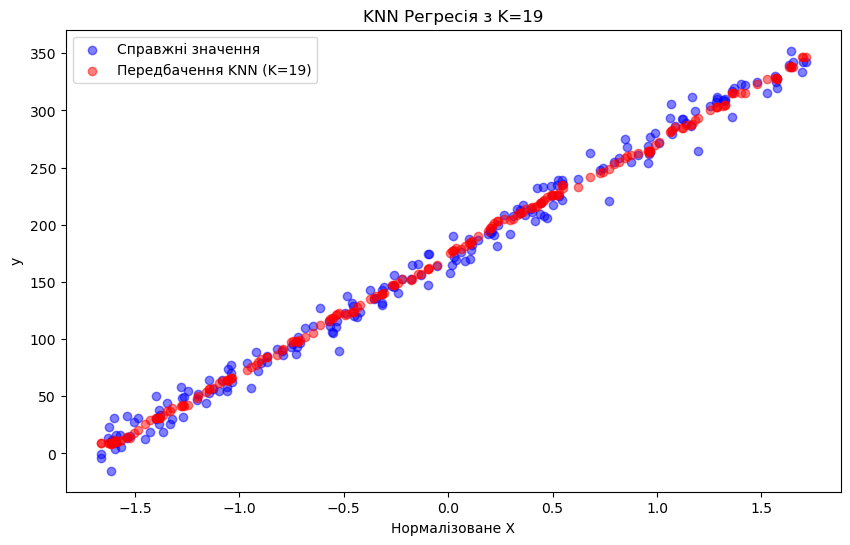

In [13]:
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k_rmse)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Справжні значення')
plt.scatter(X_test, y_pred_optimal, color='red', alpha=0.5, label=f'Передбачення KNN (K={optimal_k_rmse})')
plt.xlabel('Нормалізоване X')
plt.ylabel('y')
plt.title(f'KNN Регресія з K={optimal_k_rmse}')
plt.legend()
plt.show()

8. Графік залежності RMSE та R² від K

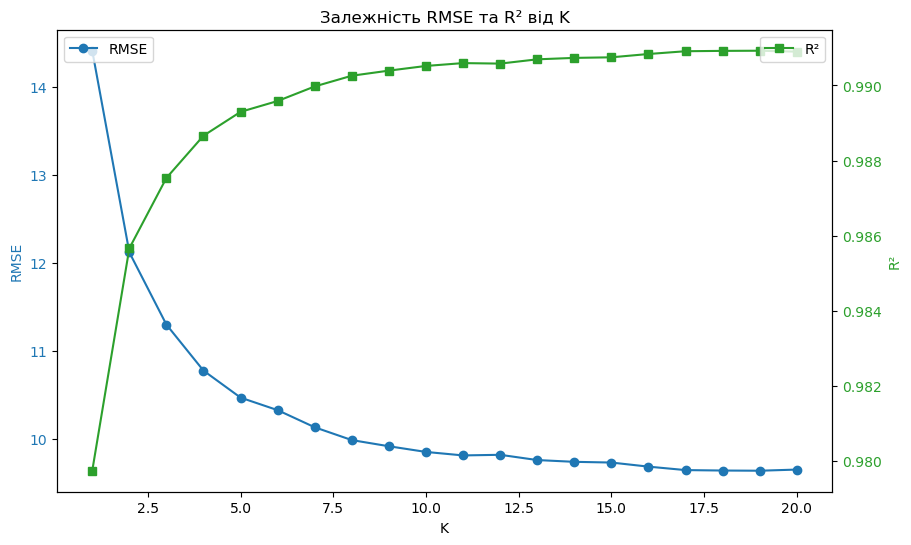

In [19]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('RMSE', color=color)
ax1.plot(k_values, rmse_values, color=color, marker='o', label='RMSE')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx() 
color = 'tab:green'
ax2.set_ylabel('R²', color=color)
ax2.plot(k_values, r2_values, color=color, marker='s', label='R²')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Залежність RMSE та R² від K')
plt.show()

In [1]:
import os
os.getcwd()

'C:\\Users\\User\\MSofAI2'